In [5]:
import pandas as pd

file_path = '/content/drive/MyDrive/Current Research/Water/water-raw/nitrate1970-1988.csv'
df = pd.read_csv(file_path)
df.head()

,pws_id,pws_name,Longitude,Latitude,date_taken,nitrate
0,2424027,Denison Water Supply,-95.366810,42.017200,6/26/1978,0.090
1,345054,Lansing Water Supply,-91.226320,43.367290,12/10/1979,0.090
2,6673016,St Ansgar Water Supply,-92.919000,43.378240,10/11/1971,4.292
3,8018040,Diagonal Water Department,-94.336607,40.808692,8/27/1980,0.023
4,7568079,Remsen Municipal Utilities,-95.971150,42.817280,12/3/1975,6.100


In [6]:
# prompt: shape of df

print(df.shape)


(14262, 6)


In [7]:
#Note, 815 values duplicate date-id-measure.
#Note, 4138 observations have 2+ duplicate date-id (2465 copies) but different nitrate measures
#Collapse duplicates to create a mean_nitrate and median_nitrate of these copies.

df.duplicated(subset=['pws_id', 'date_taken', 'nitrate']).sum()

815

In [8]:
df.duplicated(subset=['pws_id', 'date_taken']).sum()

3280

In [9]:
# prompt: create a year variable year==year in date_taken variable

df['year'] = pd.to_datetime(df['date_taken']).dt.year
df['month'] = pd.to_datetime(df['date_taken']).dt.month
df['day'] = pd.to_datetime(df['date_taken']).dt.day

df.head()

,pws_id,pws_name,Longitude,Latitude,date_taken,nitrate,year,month,day
0,2424027,Denison Water Supply,-95.366810,42.017200,6/26/1978,0.090,1978,6,26
1,345054,Lansing Water Supply,-91.226320,43.367290,12/10/1979,0.090,1979,12,10
2,6673016,St Ansgar Water Supply,-92.919000,43.378240,10/11/1971,4.292,1971,10,11
3,8018040,Diagonal Water Department,-94.336607,40.808692,8/27/1980,0.023,1980,8,27
4,7568079,Remsen Municipal Utilities,-95.971150,42.817280,12/3/1975,6.100,1975,12,3


In [10]:
import pandas as pd

# Assuming your DataFrame is named df

# Group by 'pws_id' and 'date_taken' and calculate mean and median of 'Nitrate'
df = df.groupby(['pws_id', 'year', 'month', 'day']).agg(
    nitrate_mean=('nitrate', 'mean'),
    nitrate_median=('nitrate', 'median'),
    pws_name=('pws_name', 'first'),  # Keep first occurrence (assuming it is the same within group)
    Latitude=('Latitude', 'first'),  # Keep first occurrence (assuming it is the same within group)
    Longitude=('Longitude', 'first'), # Keep first occurrence (assuming it is the same within group)
    date_taken=('date_taken', 'first') # Keep first occurrence (assuming it is the same within group)

).reset_index()

# Display the resulting DataFrame
df

,pws_id,year,month,day,nitrate_mean,nitrate_median,pws_name,Latitude,Longitude,date_taken
0,100835,1988,7,25,0.000000,0.000,GREENFIELD COUNTRY CLUB,41.345064,-94.375213,7/25/1988
1,105002,1974,9,16,1.310000,1.310,Adair Municipal Water Supply,41.496502,-94.638550,9/16/1974
2,105002,1975,1,20,1.200000,1.200,Adair Municipal Water Supply,41.496502,-94.638550,1/20/1975
3,105002,1975,4,1,0.271000,0.271,Adair Municipal Water Supply,41.496502,-94.638550,4/1/1975
4,105002,1977,7,6,0.075333,0.045,Adair Municipal Water Supply,41.496502,-94.638550,7/6/1977
...,...,...,...,...,...,...,...,...,...,...
10977,9970037,1977,8,24,0.090000,0.090,Woolstock Water Supply,42.566500,-93.841720,8/24/1977
10978,9970037,1980,11,10,1.330000,1.330,Woolstock Water Supply,42.566500,-93.841720,11/10/1980
10979,9970037,1982,3,17,0.023000,0.023,Woolstock Water Supply,42.566500,-93.841720,3/17/1982
10980,9970037,1984,12,10,0.000000,0.000,Woolstock Water Supply,42.566500,-93.841720,12/10/1984


In [11]:
import pandas as pd
from geopy.geocoders import Nominatim
from time import sleep

import warnings

warnings.resetwarnings()


In [12]:
import pandas as pd

file_path = '/content/drive/MyDrive/Current Research/Water/water-raw/sdwis.csv'
df_sdwis = pd.read_csv(file_path)

# Remove "IA" from the wsid variable and create a new variable pws_id
df_sdwis['pws_id'] = df_sdwis['wsid'].str.replace("IA", "", regex=False)

df_sdwis['pws_id'] = pd.to_numeric(df_sdwis['pws_id'], errors='coerce')

df_sdwis.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,pws_name,County,City,Pop,Type,Activity,wsid,pws_id
0,ACE MOBILE HOME PARK,Dubuque,DUBUQUE,32,GW,A,IA3100629,3100629
1,ACKLEY MUNICIPAL WATER WORKS,Hardin,ACKLEY,1599,GW,A,IA4201001,4201001
2,ADAIR MUNICIPAL WATER SUPPLY,Adair,ADAIR,799,GW,A,IA0105002,105002
3,ADEL MUNICIPAL WATER WORKS,Dallas,ADEL,6453,GW,A,IA2503003,2503003
4,AGENCY WATER WORKS,Wapello,AGENCY,620,GWP,A,IA9003006,9003006


In [13]:
# Assuming your variable is named "var"
df['pws_name'] = df['pws_name'].str.upper()
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,pws_id,year,month,day,nitrate_mean,nitrate_median,pws_name,Latitude,Longitude,date_taken
0,100835,1988,7,25,0.000000,0.000,GREENFIELD COUNTRY CLUB,41.345064,-94.375213,7/25/1988
1,105002,1974,9,16,1.310000,1.310,ADAIR MUNICIPAL WATER SUPPLY,41.496502,-94.638550,9/16/1974
2,105002,1975,1,20,1.200000,1.200,ADAIR MUNICIPAL WATER SUPPLY,41.496502,-94.638550,1/20/1975
3,105002,1975,4,1,0.271000,0.271,ADAIR MUNICIPAL WATER SUPPLY,41.496502,-94.638550,4/1/1975
4,105002,1977,7,6,0.075333,0.045,ADAIR MUNICIPAL WATER SUPPLY,41.496502,-94.638550,7/6/1977


In [14]:
# Perform a left merge (many-to-one) on 'ctnyres' to keep all rows from df
df_me1 = pd.merge(df, df_sdwis, on='pws_id', how='left')

missing_wsid_count = df_me1['wsid'].isna().sum()
print(missing_wsid_count)

df_unmatched_id = df_me1[df_me1['wsid'].isna()]
df_matched_id = df_me1[df_me1['wsid'].notna()]

df_matched_id.rename(columns={'pws_name_x': 'pws_name'}, inplace=True)

df_matched_id.drop(columns=['pws_name_y'], inplace=True)

df_matched_id.head()
print(df_matched_id.shape)



1341
(9641, 16)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-14-e42543ec0a5d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matched_id.rename(columns={'pws_name_x': 'pws_name'}, inplace=True)
<ipython-input-14-e42543ec0a5d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matched_id.drop(columns=['pws_nam

In [15]:
df_me1.rename(columns={'pws_name_x': 'pws_name'}, inplace=True)
df_me1.drop(columns=['pws_name_y'], inplace=True)

df_me1.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,pws_id,year,month,day,nitrate_mean,nitrate_median,pws_name,Latitude,Longitude,date_taken,County,City,Pop,Type,Activity,wsid
0,100835,1988,7,25,0.000000,0.000,GREENFIELD COUNTRY CLUB,41.345064,-94.375213,7/25/1988,NaN,NaN,NaN,NaN,NaN,NaN
1,105002,1974,9,16,1.310000,1.310,ADAIR MUNICIPAL WATER SUPPLY,41.496502,-94.638550,9/16/1974,Adair,ADAIR,799.0,GW,A,IA0105002
2,105002,1975,1,20,1.200000,1.200,ADAIR MUNICIPAL WATER SUPPLY,41.496502,-94.638550,1/20/1975,Adair,ADAIR,799.0,GW,A,IA0105002
3,105002,1975,4,1,0.271000,0.271,ADAIR MUNICIPAL WATER SUPPLY,41.496502,-94.638550,4/1/1975,Adair,ADAIR,799.0,GW,A,IA0105002
4,105002,1977,7,6,0.075333,0.045,ADAIR MUNICIPAL WATER SUPPLY,41.496502,-94.638550,7/6/1977,Adair,ADAIR,799.0,GW,A,IA0105002


In [16]:
df_unmatched_id = df_me1[df_me1['wsid'].isna()]
df_unmatched_id = df_unmatched_id[['Latitude', 'Longitude']]



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
df_unmatched_id.drop_duplicates(inplace=True)
print(df_unmatched_id.shape)

df_unmatched_id.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(404, 2)


,Latitude,Longitude
0,41.345064,-94.375213
11,41.520023,-94.585609
12,41.180169,-94.642883
109,40.942235,-94.894584
119,41.022646,-94.610880


In [18]:
warnings.filterwarnings('ignore')

# Initialize geolocator
geolocator = Nominatim(user_agent="geoapiExercises")

# 1. Create a unique id variable for all observations
df_unmatched_id['id'] = df_unmatched_id.index

# 2. Create a variable name county_imp initialized to "blank"
df_unmatched_id['county_imp'] = "blank"

# 3. Loop over every id and identify the county based on Latitude and Longitude
def get_county(lat, lon):
    try:
        location = geolocator.reverse((lat, lon), exactly_one=True)
        address = location.raw['address']
        return address.get('county', 'Unknown')
    except:
        return 'Unknown'

# Iterate over each row in the dataframe
for idx, row in df_unmatched_id.iterrows():
    latitude = row['Latitude']
    longitude = row['Longitude']

    # Get the county for the current latitude and longitude
    county_name = get_county(latitude, longitude)

    # 4. Replace the value of county_imp with the identified county
    df_unmatched_id.at[idx, 'county_imp'] = county_name

    # Sleep to avoid hitting the geocoding rate limit
    sleep(1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
print(df_unmatched_id[['id', 'Latitude', 'Longitude', 'county_imp']].to_string())


          id   Latitude  Longitude county_imp
0          0  41.345064 -94.375213    Unknown
11        11  41.520023 -94.585609    Unknown
12        12  41.180169 -94.642883    Unknown
109      109  40.942235 -94.894584    Unknown
119      119  41.022646 -94.610880    Unknown
129      129  41.141419 -94.565932    Unknown
130      130  43.360826 -91.253764    Unknown
131      131  43.174764 -91.175107    Unknown
132      132  43.154664 -91.181744    Unknown
133      133  43.139174 -91.183888    Unknown
134      134  43.186112 -91.168997    Unknown
135      135  43.184419 -91.170119    Unknown
136      136  43.200322 -91.151205    Unknown
138      138  43.200835 -91.152851    Unknown
165      165  42.971569 -91.513998    Unknown
166      166  43.212529 -91.297138    Unknown
214      214  41.733165 -94.944646    Unknown
233      233  41.553240 -94.813498    Unknown
234      234  41.820000 -95.034851    Unknown
248      248  41.992826 -91.892524    Unknown
249      249  42.181339 -91.956978

In [20]:
df_unmatched_id2 = df_me1[df_me1['wsid'].isna()]
df_unmatched_id2

,pws_id,year,month,day,nitrate_mean,nitrate_median,pws_name,Latitude,Longitude,date_taken,County,City,Pop,Type,Activity,wsid
0,100835,1988,7,25,0.0000,0.0000,GREENFIELD COUNTRY CLUB,41.345064,-94.375213,7/25/1988,NaN,NaN,NaN,NaN,NaN,NaN
11,105509,1988,12,20,5.0000,5.0000,ADAIR-CASEY COMMUNITY SCHOOL,41.520023,-94.585609,12/20/1988,NaN,NaN,NaN,NaN,NaN,NaN
12,115042,1973,2,8,13.3280,13.3280,BRIDGEWATER MUNICIPAL WATER WORKS,41.180169,-94.642883,2/8/1973,NaN,NaN,NaN,NaN,NaN,NaN
13,115042,1974,11,27,13.5540,13.5540,BRIDGEWATER MUNICIPAL WATER WORKS,41.180169,-94.642883,11/27/1974,NaN,NaN,NaN,NaN,NaN,NaN
14,115042,1977,7,6,17.6200,17.6200,BRIDGEWATER MUNICIPAL WATER WORKS,41.180169,-94.642883,7/6/1977,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10957,9932071,1985,6,11,0.4520,0.4520,GALT MUNICIPAL WATER SUPPLY,42.690555,-93.596543,6/11/1985,NaN,NaN,NaN,NaN,NaN,NaN
10964,9937401,1988,8,8,0.9000,0.9000,OAK RIDGE RECREATION ASSN,42.742710,-93.931910,8/8/1988,NaN,NaN,NaN,NaN,NaN,NaN
10965,9942027,1976,9,21,0.2285,0.2285,HOLMES WATER FUND,42.737442,-93.833789,9/21/1976,NaN,NaN,NaN,NaN,NaN,NaN
10966,9942027,1979,6,26,0.0450,0.0450,HOLMES WATER FUND,42.737442,-93.833789,6/26/1979,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
import pandas as pd

df_unmatched_merge = pd.merge(df_unmatched_id2, df_unmatched_id, how='left', on=['Latitude', 'Longitude'])

print(df_unmatched_merge[['id', 'Latitude', 'Longitude', 'county_imp']].to_string())


         id   Latitude  Longitude county_imp
0         0  41.345064 -94.375213    Unknown
1        11  41.520023 -94.585609    Unknown
2        12  41.180169 -94.642883    Unknown
3        12  41.180169 -94.642883    Unknown
4        12  41.180169 -94.642883    Unknown
5        12  41.180169 -94.642883    Unknown
6        12  41.180169 -94.642883    Unknown
7        12  41.180169 -94.642883    Unknown
8        12  41.180169 -94.642883    Unknown
9        12  41.180169 -94.642883    Unknown
10       12  41.180169 -94.642883    Unknown
11      109  40.942235 -94.894584    Unknown
12      109  40.942235 -94.894584    Unknown
13      109  40.942235 -94.894584    Unknown
14      109  40.942235 -94.894584    Unknown
15      109  40.942235 -94.894584    Unknown
16      109  40.942235 -94.894584    Unknown
17      109  40.942235 -94.894584    Unknown
18      109  40.942235 -94.894584    Unknown
19      109  40.942235 -94.894584    Unknown
20      109  40.942235 -94.894584    Unknown
21      11

In [22]:
df_combined = pd.concat([df_matched_id, df_unmatched_merge], axis=0, ignore_index=True)
df_combined

,pws_id,year,month,day,nitrate_mean,nitrate_median,pws_name,Latitude,Longitude,date_taken,County,City,Pop,Type,Activity,wsid,id,county_imp
0,105002,1974,9,16,1.310000,1.3100,ADAIR MUNICIPAL WATER SUPPLY,41.496502,-94.638550,9/16/1974,Adair,ADAIR,799.0,GW,A,IA0105002,NaN,NaN
1,105002,1975,1,20,1.200000,1.2000,ADAIR MUNICIPAL WATER SUPPLY,41.496502,-94.638550,1/20/1975,Adair,ADAIR,799.0,GW,A,IA0105002,NaN,NaN
2,105002,1975,4,1,0.271000,0.2710,ADAIR MUNICIPAL WATER SUPPLY,41.496502,-94.638550,4/1/1975,Adair,ADAIR,799.0,GW,A,IA0105002,NaN,NaN
3,105002,1977,7,6,0.075333,0.0450,ADAIR MUNICIPAL WATER SUPPLY,41.496502,-94.638550,7/6/1977,Adair,ADAIR,799.0,GW,A,IA0105002,NaN,NaN
4,105002,1979,3,20,20.000000,20.0000,ADAIR MUNICIPAL WATER SUPPLY,41.496502,-94.638550,3/20/1979,Adair,ADAIR,799.0,GW,A,IA0105002,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10977,9932071,1985,6,11,0.452000,0.4520,GALT MUNICIPAL WATER SUPPLY,42.690555,-93.596543,6/11/1985,NaN,NaN,NaN,NaN,NaN,NaN,10951.0,Unknown
10978,9937401,1988,8,8,0.900000,0.9000,OAK RIDGE RECREATION ASSN,42.742710,-93.931910,8/8/1988,NaN,NaN,NaN,NaN,NaN,NaN,10964.0,Unknown
10979,9942027,1976,9,21,0.228500,0.2285,HOLMES WATER FUND,42.737442,-93.833789,9/21/1976,NaN,NaN,NaN,NaN,NaN,NaN,10965.0,Unknown
10980,9942027,1979,6,26,0.045000,0.0450,HOLMES WATER FUND,42.737442,-93.833789,6/26/1979,NaN,NaN,NaN,NaN,NaN,NaN,10965.0,Unknown


In [23]:
# Drop the 'countyname' column
#df_combined.drop(columns=['countyname'], inplace=True)
df_combined['county_imp'] = df_combined['county_imp'].str.replace(" County", "", regex=False)

df_combined['countyname'] = df_combined['County'].where(df_combined['County'].notna(), df_combined['county_imp'])


nan_count = df_combined['countyname'].isna().sum()
print(f"Number of NaNs in 'countyname': {nan_count}")


Number of NaNs in 'countyname': 0


In [24]:
#823 duplicates by id-yearmonth (168 with exact nitrate measures)
df_combined.duplicated(subset=['pws_id', 'year', 'month', 'day']).sum()


0

In [25]:
print(df_combined.shape)


(10982, 19)


In [26]:
df_combined["Coordinates"] = list(zip(df.Longitude, df.Latitude))
df_combined.head()

,pws_id,year,month,day,nitrate_mean,nitrate_median,pws_name,Latitude,Longitude,date_taken,County,City,Pop,Type,Activity,wsid,id,county_imp,countyname,Coordinates
0,105002,1974,9,16,1.310000,1.310,ADAIR MUNICIPAL WATER SUPPLY,41.496502,-94.63855,9/16/1974,Adair,ADAIR,799.0,GW,A,IA0105002,NaN,NaN,Adair,"(-94.3752126, 41.3450642)"
1,105002,1975,1,20,1.200000,1.200,ADAIR MUNICIPAL WATER SUPPLY,41.496502,-94.63855,1/20/1975,Adair,ADAIR,799.0,GW,A,IA0105002,NaN,NaN,Adair,"(-94.6385504, 41.496502)"
2,105002,1975,4,1,0.271000,0.271,ADAIR MUNICIPAL WATER SUPPLY,41.496502,-94.63855,4/1/1975,Adair,ADAIR,799.0,GW,A,IA0105002,NaN,NaN,Adair,"(-94.6385504, 41.496502)"
3,105002,1977,7,6,0.075333,0.045,ADAIR MUNICIPAL WATER SUPPLY,41.496502,-94.63855,7/6/1977,Adair,ADAIR,799.0,GW,A,IA0105002,NaN,NaN,Adair,"(-94.6385504, 41.496502)"
4,105002,1979,3,20,20.000000,20.000,ADAIR MUNICIPAL WATER SUPPLY,41.496502,-94.63855,3/20/1979,Adair,ADAIR,799.0,GW,A,IA0105002,NaN,NaN,Adair,"(-94.6385504, 41.496502)"


In [27]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [28]:
df_combined["Coordinates"] = df_combined["Coordinates"].apply(Point)
df_combined.head()

,pws_id,year,month,day,nitrate_mean,nitrate_median,pws_name,Latitude,Longitude,date_taken,County,City,Pop,Type,Activity,wsid,id,county_imp,countyname,Coordinates
0,105002,1974,9,16,1.310000,1.310,ADAIR MUNICIPAL WATER SUPPLY,41.496502,-94.63855,9/16/1974,Adair,ADAIR,799.0,GW,A,IA0105002,NaN,NaN,Adair,POINT (-94.3752126 41.3450642)
1,105002,1975,1,20,1.200000,1.200,ADAIR MUNICIPAL WATER SUPPLY,41.496502,-94.63855,1/20/1975,Adair,ADAIR,799.0,GW,A,IA0105002,NaN,NaN,Adair,POINT (-94.6385504 41.496502)
2,105002,1975,4,1,0.271000,0.271,ADAIR MUNICIPAL WATER SUPPLY,41.496502,-94.63855,4/1/1975,Adair,ADAIR,799.0,GW,A,IA0105002,NaN,NaN,Adair,POINT (-94.6385504 41.496502)
3,105002,1977,7,6,0.075333,0.045,ADAIR MUNICIPAL WATER SUPPLY,41.496502,-94.63855,7/6/1977,Adair,ADAIR,799.0,GW,A,IA0105002,NaN,NaN,Adair,POINT (-94.6385504 41.496502)
4,105002,1979,3,20,20.000000,20.000,ADAIR MUNICIPAL WATER SUPPLY,41.496502,-94.63855,3/20/1979,Adair,ADAIR,799.0,GW,A,IA0105002,NaN,NaN,Adair,POINT (-94.6385504 41.496502)


In [29]:
gdf = gpd.GeoDataFrame(df_combined, geometry="Coordinates")
gdf.head()

,pws_id,year,month,day,nitrate_mean,nitrate_median,pws_name,Latitude,Longitude,date_taken,County,City,Pop,Type,Activity,wsid,id,county_imp,countyname,Coordinates
0,105002,1974,9,16,1.310000,1.310,ADAIR MUNICIPAL WATER SUPPLY,41.496502,-94.63855,9/16/1974,Adair,ADAIR,799.0,GW,A,IA0105002,NaN,NaN,Adair,POINT (-94.37521 41.34506)
1,105002,1975,1,20,1.200000,1.200,ADAIR MUNICIPAL WATER SUPPLY,41.496502,-94.63855,1/20/1975,Adair,ADAIR,799.0,GW,A,IA0105002,NaN,NaN,Adair,POINT (-94.63855 41.4965)
2,105002,1975,4,1,0.271000,0.271,ADAIR MUNICIPAL WATER SUPPLY,41.496502,-94.63855,4/1/1975,Adair,ADAIR,799.0,GW,A,IA0105002,NaN,NaN,Adair,POINT (-94.63855 41.4965)
3,105002,1977,7,6,0.075333,0.045,ADAIR MUNICIPAL WATER SUPPLY,41.496502,-94.63855,7/6/1977,Adair,ADAIR,799.0,GW,A,IA0105002,NaN,NaN,Adair,POINT (-94.63855 41.4965)
4,105002,1979,3,20,20.000000,20.000,ADAIR MUNICIPAL WATER SUPPLY,41.496502,-94.63855,3/20/1979,Adair,ADAIR,799.0,GW,A,IA0105002,NaN,NaN,Adair,POINT (-94.63855 41.4965)


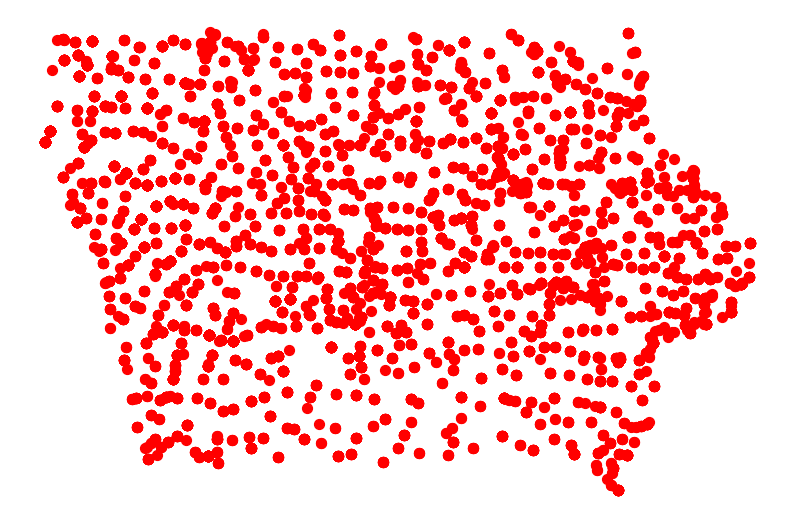

In [30]:



# Step 2: Create a GeoDataFrame with Points
# Create the geometry column from Latitude and Longitude
df["Coordinates"] = df.apply(lambda row: Point(row["Longitude"], row["Latitude"]), axis=1)

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")

# Step 3: Set the CRS (WGS84 EPSG:4326)
gdf.set_crs(epsg=4326, inplace=True)

# Step 4: Plot the GeoDataFrame
fig, gax = plt.subplots(figsize=(10, 10))

# Plot the points
gdf.plot(ax=gax, color='red', markersize=50)

# Remove the latitude and longitude labels
gax.set_xticks([])
gax.set_yticks([])
gax.axis('off')

plt.show()


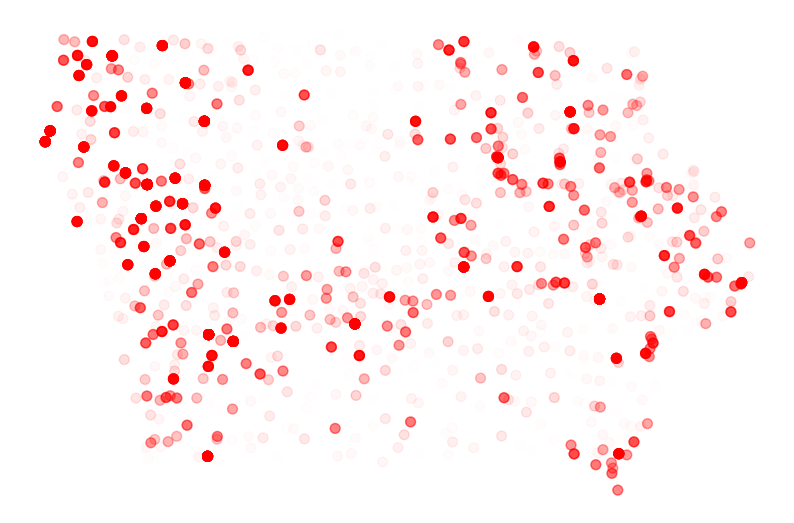

In [31]:


# Step 2: Create a GeoDataFrame with Points
# Create the geometry column from Latitude and Longitude
df["Coordinates"] = df.apply(lambda row: Point(row["Longitude"], row["Latitude"]), axis=1)

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")

# Step 3: Set the CRS (WGS84 EPSG:4326)
gdf.set_crs(epsg=4326, inplace=True)

# Normalize the nitrate_median values between 0 and 1
gdf['nitrate_median_normalized'] = (gdf['nitrate_median'] - gdf['nitrate_median'].min()) / (gdf['nitrate_median'].max() - gdf['nitrate_median'].min())

# Step 4: Plot the GeoDataFrame
fig, gax = plt.subplots(figsize=(10, 10))

# Plot the points
gdf.plot(ax=gax, color='red', markersize=50, alpha=gdf['nitrate_median_normalized'])

# Remove the latitude and longitude labels
gax.set_xticks([])
gax.set_yticks([])
gax.axis('off')

plt.show()

In [32]:
# Doesn't look different than a vanilla DataFrame...let's make sure we have what we want
print('gdf is of type:', type(gdf))

# And how can we tell which column is the geometry column?
print('\nThe geometry column is:', gdf.geometry.name)

gdf is of type: <class 'geopandas.geodataframe.GeoDataFrame'>

The geometry column is: Coordinates


Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'AFFGEOID', 'GEOID', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry'],
      dtype='object')
  STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID     NAME LSAD       ALAND  \
0      21      007  00516850  0500000US21007  21007  Ballard   06   639387454   
1      21      017  00516855  0500000US21017  21017  Bourbon   06   750439351   
2      21      031  00516862  0500000US21031  21031   Butler   06  1103571974   
3      21      065  00516879  0500000US21065  21065   Estill   06   655509930   
4      21      069  00516881  0500000US21069  21069  Fleming   06   902727151   

     AWATER                                           geometry  
0  69473325  POLYGON ((-89.18137 37.0463, -89.17938 37.0530...  
1   4829777  POLYGON ((-84.44266 38.28324, -84.44114 38.283...  
2  13943044  POLYGON ((-86.94486 37.07341, -86.94346 37.074...  
3   6516335  POLYGON ((-84.12662 37.6454, -84.12483 37.6461...  
4   7182793  POLYGON ((-83.98428 38.44549, -83.9

<Axes: >

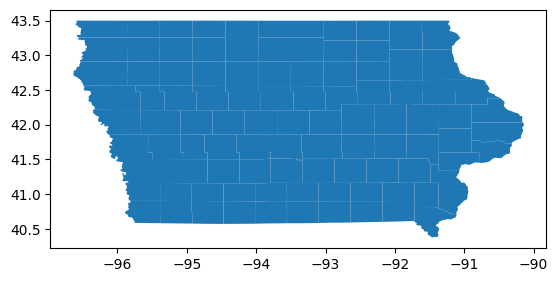

In [33]:
import geopandas as gpd

# 1. Load the shapefile (replace 'path_to_shapefile' with the actual path)
us_geo = gpd.read_file('/content/drive/MyDrive/Current Research/Water/water-raw/cb_2018_us_county_500k.shp')

# 2. Inspect the GeoDataFrame to identify the correct column
print(us_geo.columns)
print(us_geo.head())

# 3. Filter the GeoDataFrame for Iowa
# Assuming there is a column named 'STATE_NAME' or 'NAME' that identifies the states
iowa_gdf = us_geo[us_geo['STATEFP'] == '19']

# Alternatively, if the column is named differently, replace 'STATE_NAME' with the correct column name

# 4. Plot the Iowa shapefile to confirm
iowa_gdf.plot()



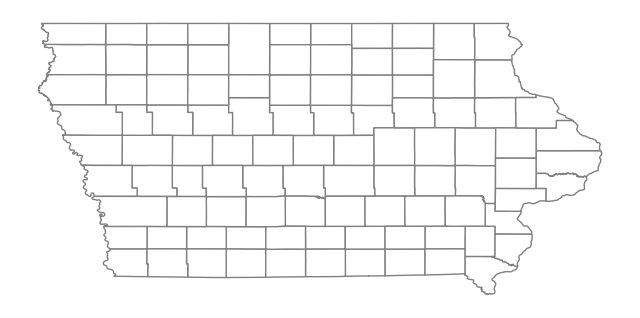

In [34]:

fig, ax = plt.subplots(figsize=(8, 8))
iowa_gdf.plot(ax=ax, color='white', edgecolor='gray')

# 4. Customize the plot - remove the latitude and longitude labels
ax.set_xticks([])  # Remove x-axis labels
ax.set_yticks([])  # Remove y-axis labels

# Optionally remove the axis frame if desired
ax.axis('off')

plt.show()

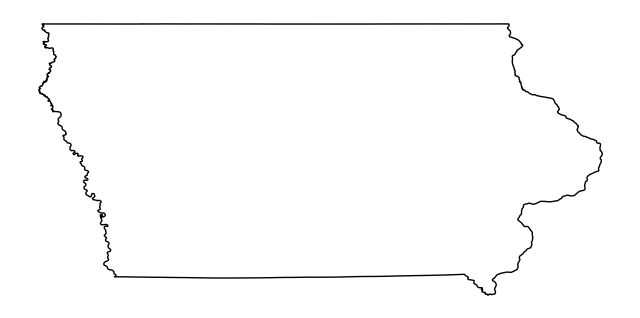

In [35]:

# 3. Dissolve the internal county boundaries to get a single shape for the state
iowa_dissolved = iowa_gdf.dissolve(by='STATEFP')

# 4. Plot the dissolved shapefile with custom styling
fig, ax = plt.subplots(figsize=(8, 8))
iowa_dissolved.plot(ax=ax, color='white', edgecolor='black')

# 5. Remove the latitude and longitude labels
ax.set_xticks([])  # Remove x-axis labels
ax.set_yticks([])  # Remove y-axis labels

# Optionally remove the axis frame if desired
ax.axis('off')

plt.show()


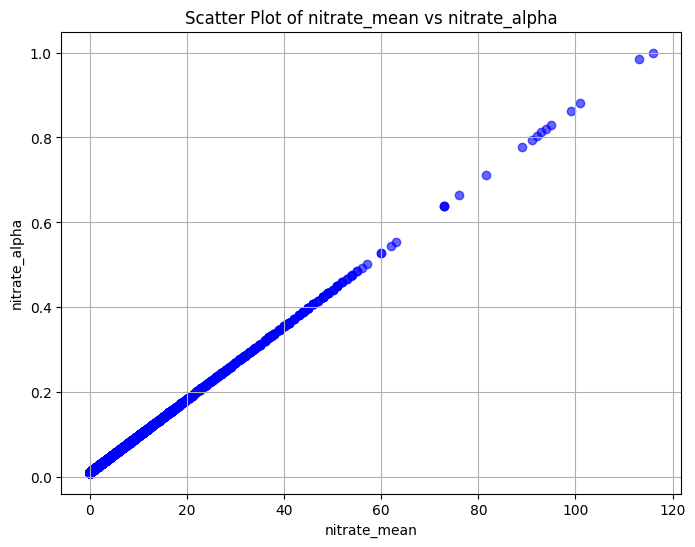

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming gdf is your GeoDataFrame with 'nitrate_mean'

# 1. Check for NaN or infinite values and handle them
gdf = gdf.dropna(subset=['nitrate_mean'])  # Drop rows where nitrate_mean is NaN

# 2. Normalize nitrate_mean values to range between 0 and 1
nitrate_alpha = (gdf['nitrate_mean'] - gdf['nitrate_mean'].min()) / (
                gdf['nitrate_mean'].max() - gdf['nitrate_mean'].min())
nitrate_alpha = nitrate_alpha.fillna(0)  # Replace NaN alpha values with 0 (fully transparent)

nitrate_alpha = nitrate_alpha.apply(lambda x: x + 0.01 if x < 0.99 else x)

import matplotlib.pyplot as plt

# 2. Create a scatter plot of nitrate_mean vs nitrate_alpha
plt.figure(figsize=(8, 6))
plt.scatter(gdf['nitrate_mean'], nitrate_alpha, color='blue', alpha=0.6)

plt.title('Scatter Plot of nitrate_mean vs nitrate_alpha')
plt.xlabel('nitrate_mean')
plt.ylabel('nitrate_alpha')
plt.grid(True)

plt.show()



In [37]:
# Assuming nitrate_alpha has been computed as per the previous steps

#Calculate the range (min and max) of nitrate_alpha
nitrate_alpha_min = nitrate_alpha.min()
nitrate_alpha_max = nitrate_alpha.max()

# 3. Print the results
print(f"Range of nitrate_alpha: {nitrate_alpha_min} to {nitrate_alpha_max}")


Range of nitrate_alpha: 0.01 to 1.0


In [38]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Check if the GeoDataFrame has valid geometry
print(gdf.crs)
print(iowa_dissolved.crs)

EPSG:4326
None


(-96.96468614999999, -89.81507885, 40.21921625, 43.65748075)

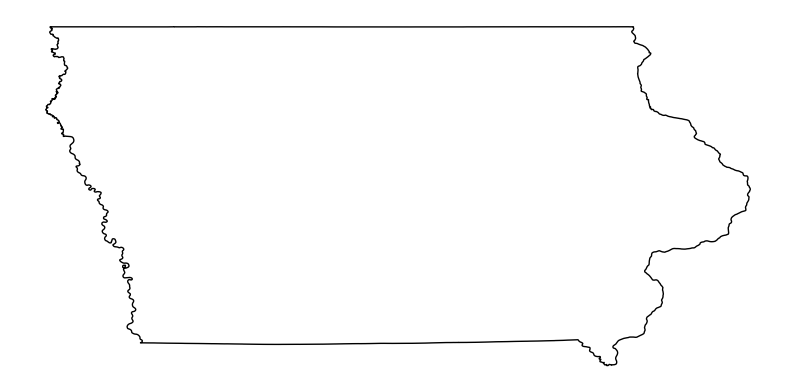

In [39]:
# Step 2: Simple Plot Test
fig, gax = plt.subplots(figsize=(10, 10))

# Plot the dissolved Iowa GeoDataFrame with custom styling
iowa_dissolved.plot(ax=gax, edgecolor='black', color='white')

# Try plotting just the points with a simple configuration

# Remove the latitude and longitude labels
gax.set_xticks([])  # Remove x-axis labels
gax.set_yticks([])  # Remove y-axis labels

# Optionally remove the axis frame if desired
gax.axis('off')

(-96.96468614999999, -89.81507885, 40.21921625, 43.65748075)

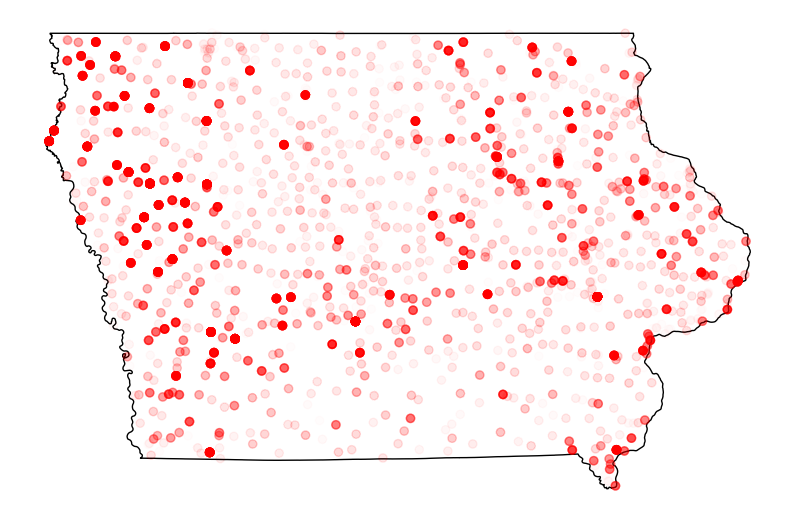

In [40]:
# Step 2: Simple Plot Test
fig, gax = plt.subplots(figsize=(10, 10))

# Plot the dissolved Iowa GeoDataFrame with custom styling
iowa_dissolved.plot(ax=gax, edgecolor='black', color='white')

# Try plotting just the points with a simple configuration
gdf.plot(ax=gax, color='red', alpha = nitrate_alpha)

# Remove the latitude and longitude labels
gax.set_xticks([])  # Remove x-axis labels
gax.set_yticks([])  # Remove y-axis labels

# Optionally remove the axis frame if desired
gax.axis('off')

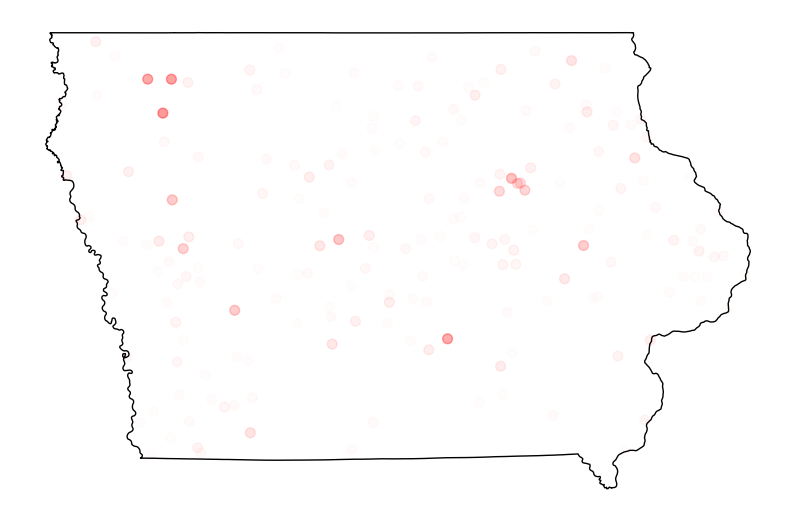

In [43]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Assuming 'Year' is a column in your GeoDataFrame and '1970' is a year of interest

# Step 1: Subset the GeoDataFrame for the year 1970
gdf_1970 = gdf[gdf['year'] == 1970]

# Step 2: Plot the base map for Iowa
fig, gax = plt.subplots(figsize=(10, 10))
iowa_dissolved.plot(ax=gax, edgecolor='black', color='white')

# Step 3: Plot the points for the year 1970
gdf_1970.plot(ax=gax, color='red', alpha=nitrate_alpha, markersize=50)

# Remove the latitude and longitude labels for a cleaner look
gax.set_xticks([])  # Remove x-axis labels
gax.set_yticks([])  # Remove y-axis labels

# Optionally remove the axis frame if desired
gax.axis('off')

plt.show()


In [44]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Define the range of years you want to plot
years = range(1970, 1989)

# Loop through each year
for year in years:
    # Step 1: Subset the GeoDataFrame for the specific year
    gdf_year = gdf[gdf['year'] == year]

    # Step 2: Create the plot
    fig, gax = plt.subplots(figsize=(10, 10))
    iowa_dissolved.plot(ax=gax, edgecolor='black', color='white')

    # Step 3: Plot the points for the specific year
    gdf_year.plot(ax=gax, color='red', alpha=nitrate_alpha, markersize=50)

    # Remove the latitude and longitude labels for a cleaner look
    gax.set_xticks([])  # Remove x-axis labels
    gax.set_yticks([])  # Remove y-axis labels
    gax.axis('off')

    # Add a title with the year
    gax.set_title(f'Year: {year}', fontsize=16)

    # Step 4: Save the plot as a PNG file
    plt.savefig(f'{year}.png', bbox_inches='tight', dpi=300)

    # Close the plot to free up memory
    plt.close(fig)


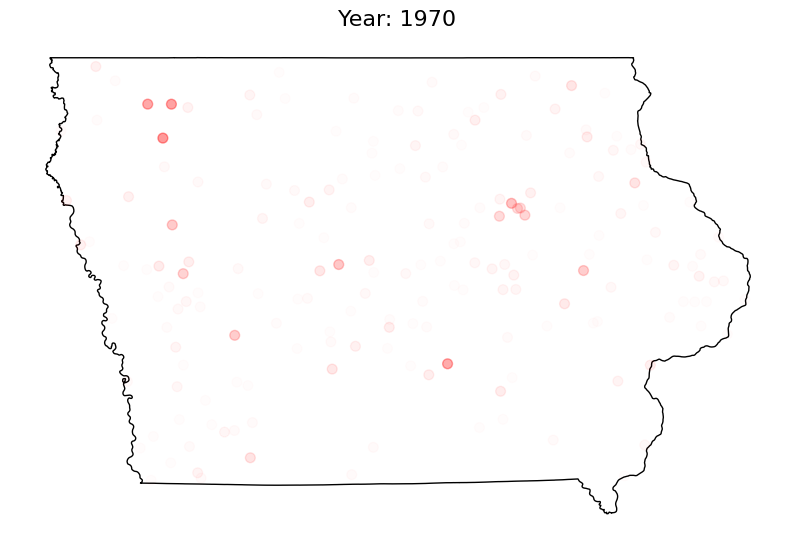

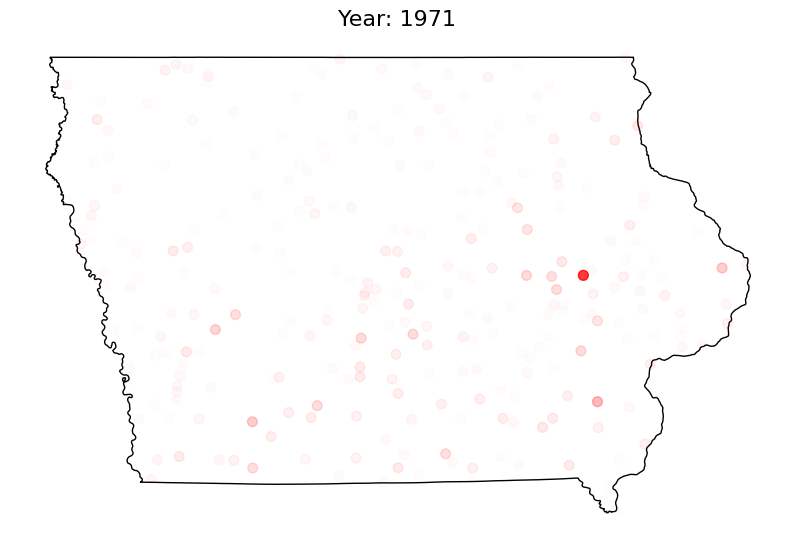

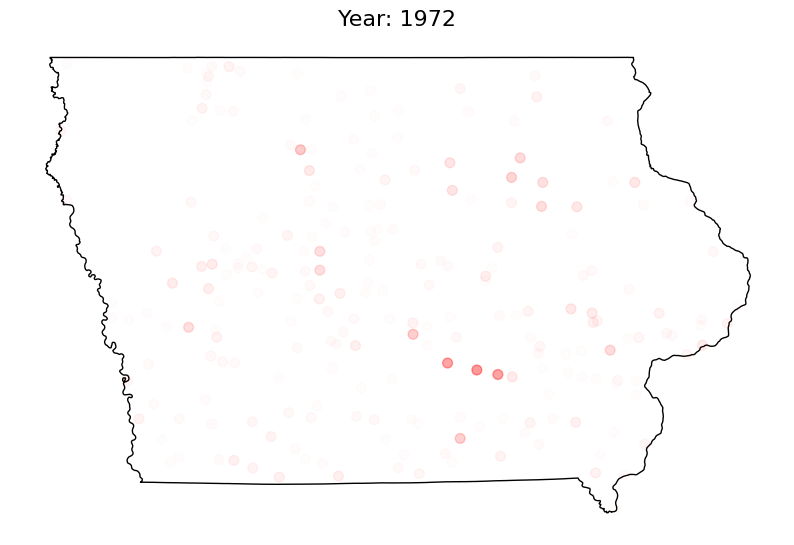

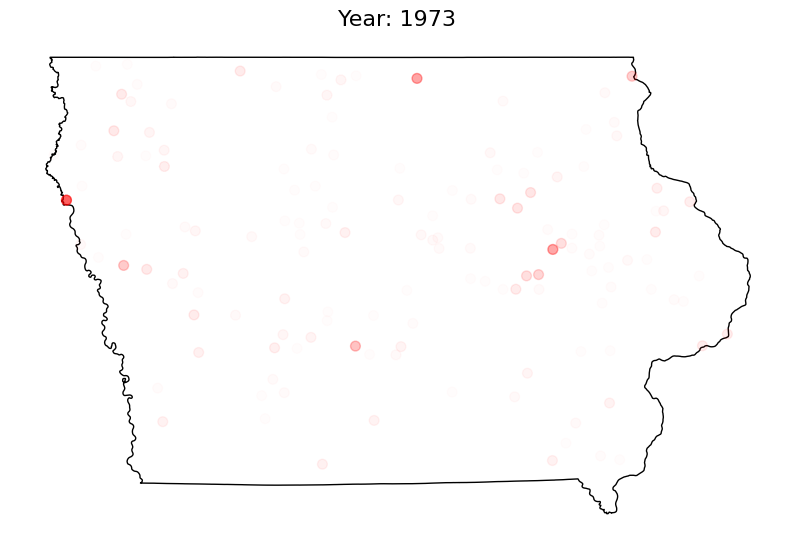

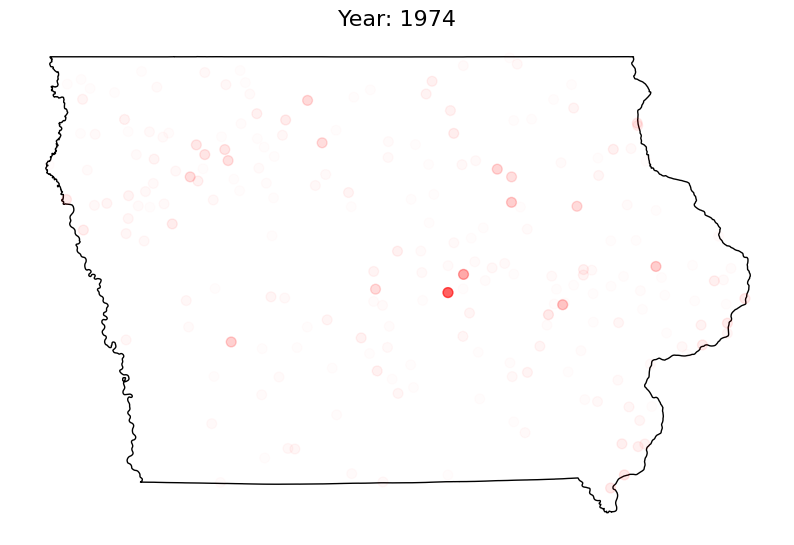

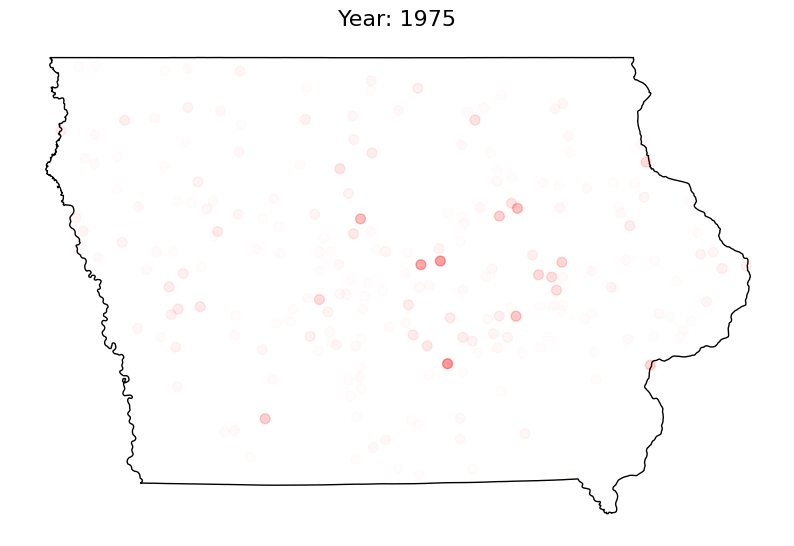

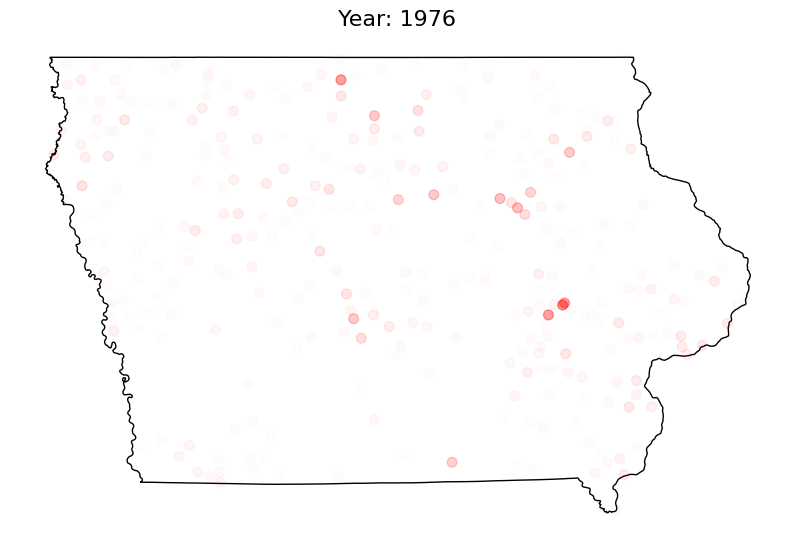

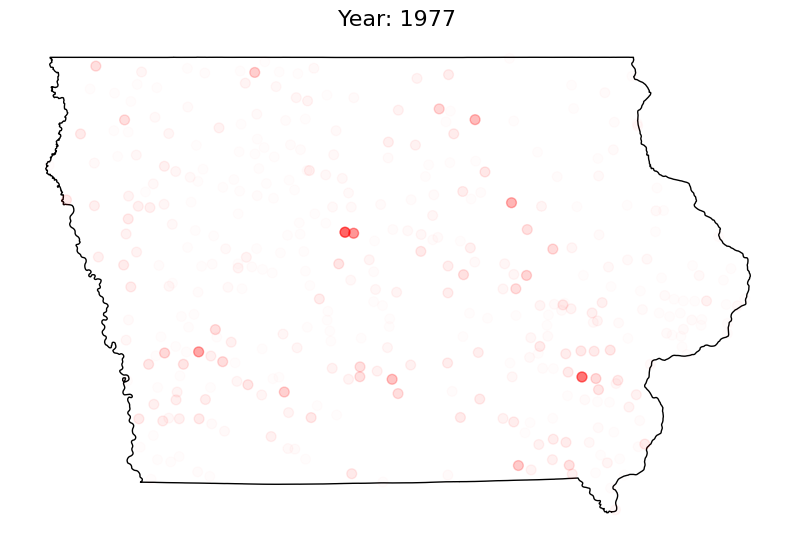

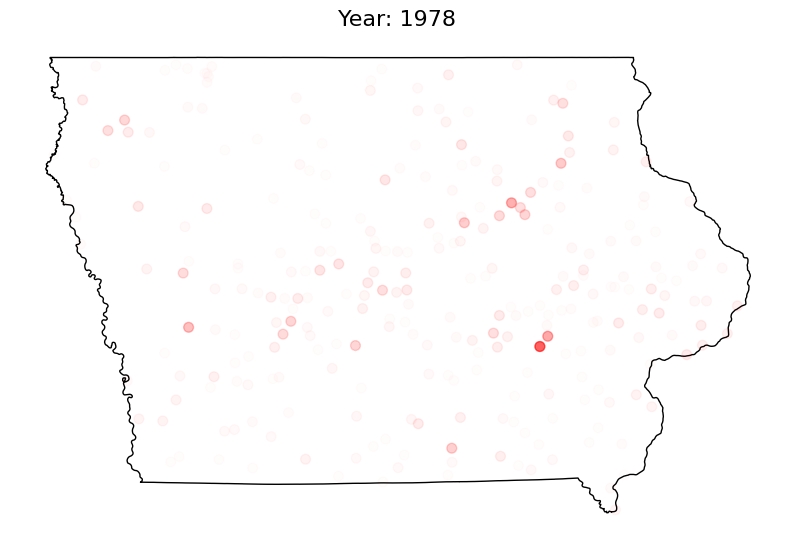

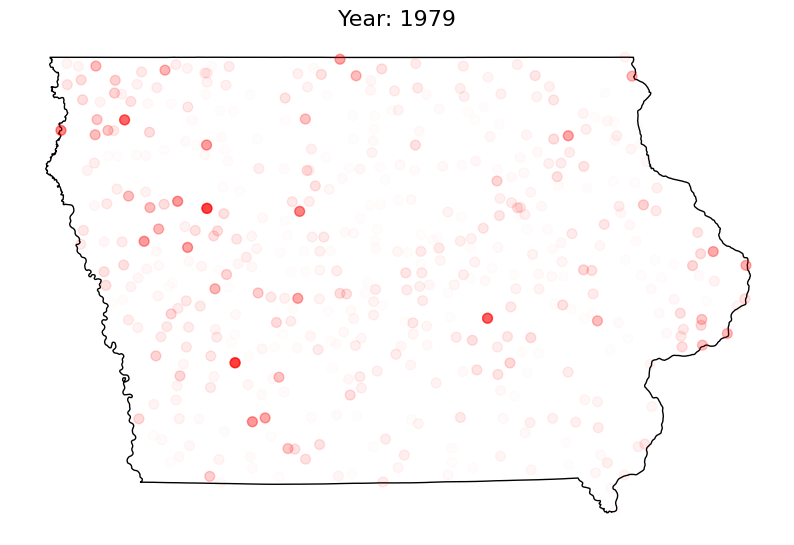

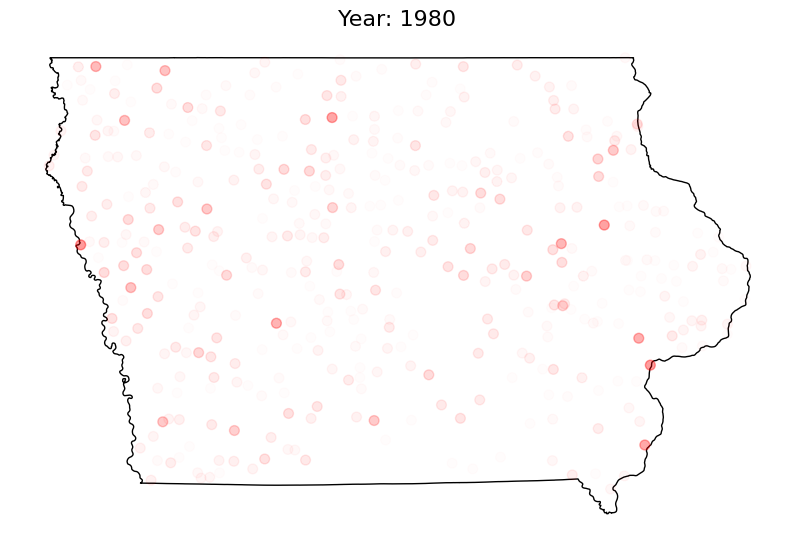

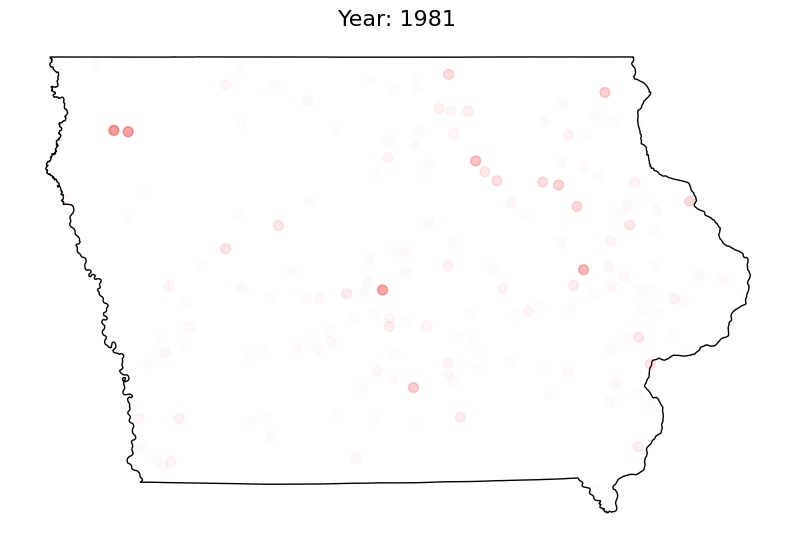

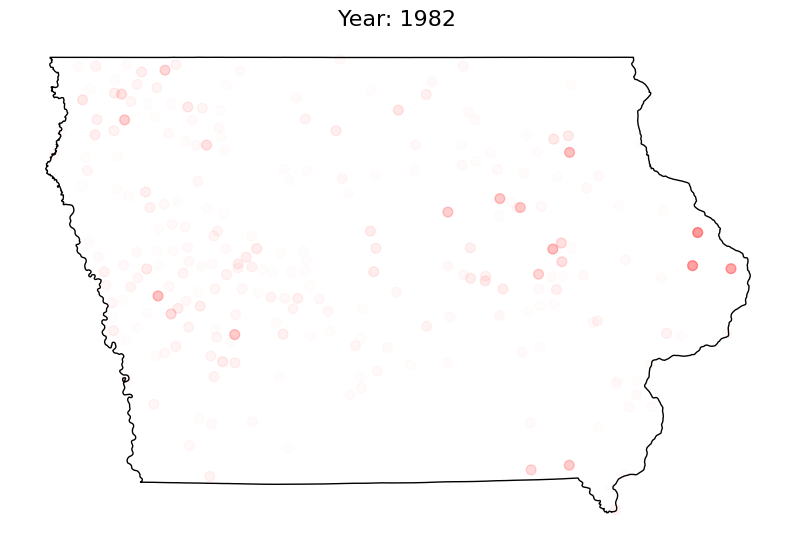

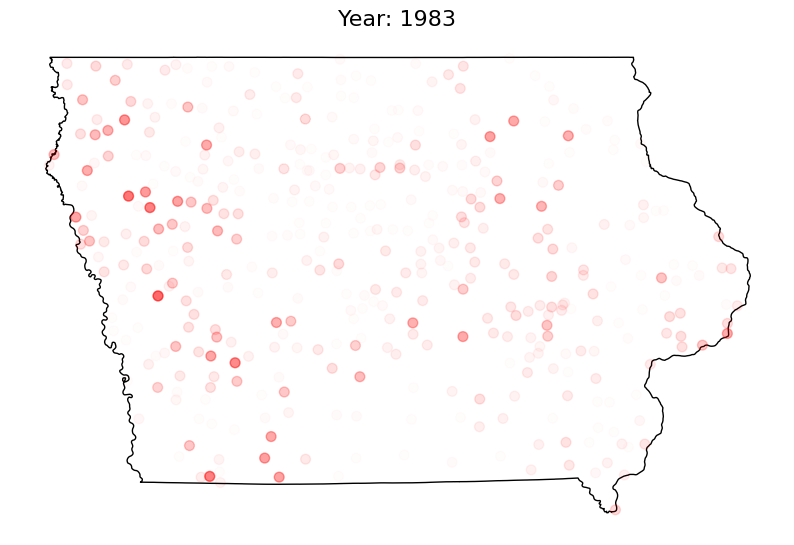

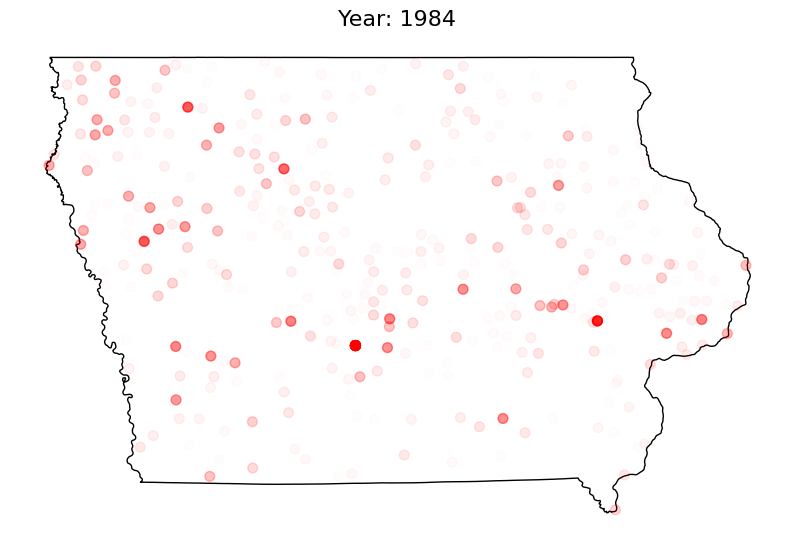

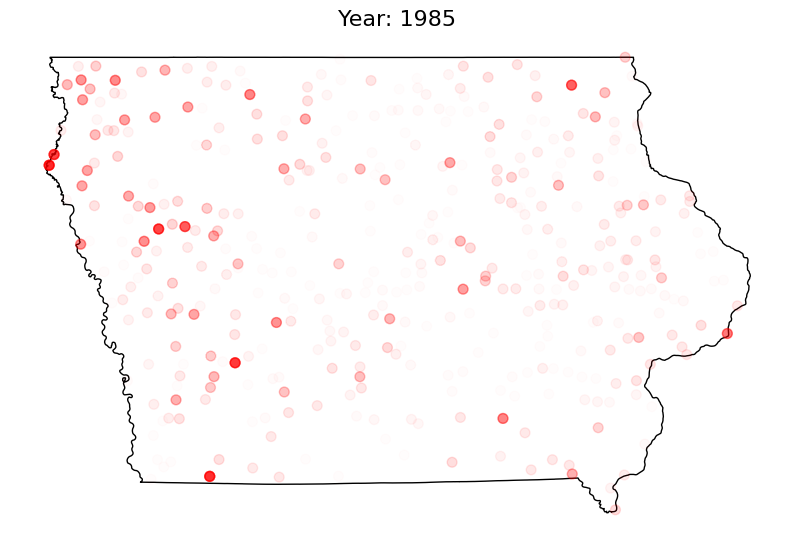

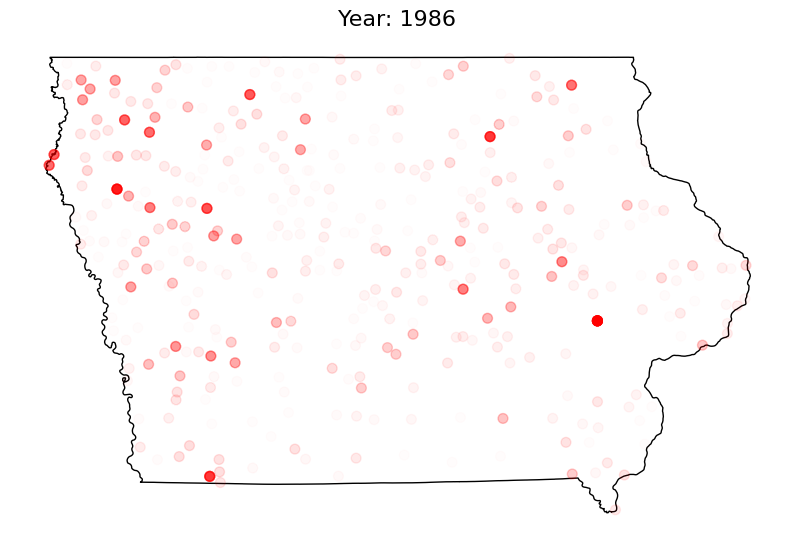

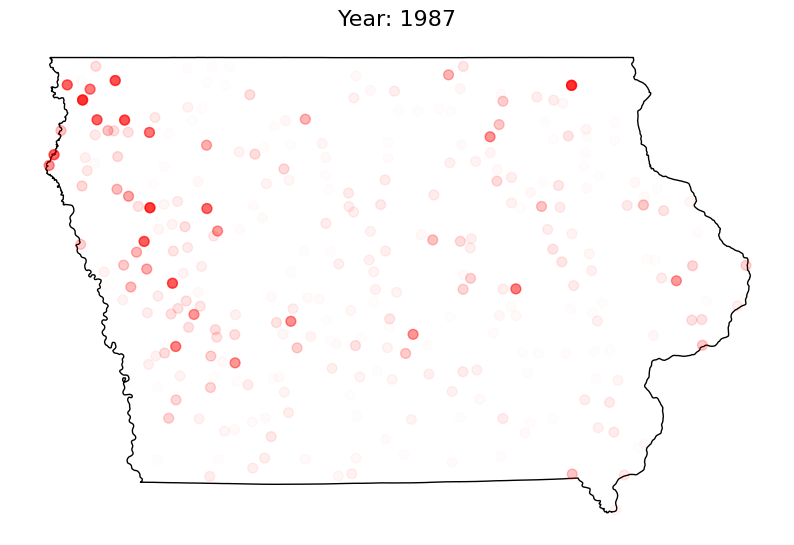

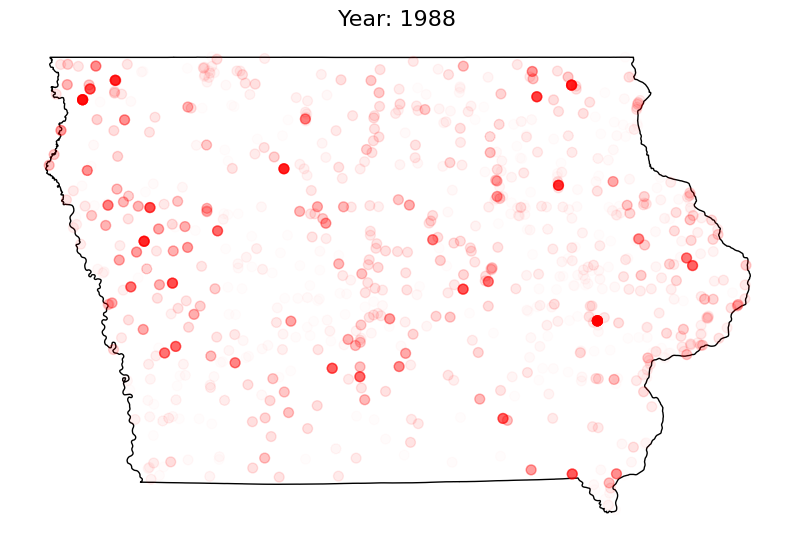

In [45]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Define the range of years you want to plot
years = range(1970, 1989)

# Loop through each year
for year in years:
    # Step 1: Subset the GeoDataFrame for the specific year
    gdf_year = gdf[gdf['year'] == year]

    # Step 2: Create the plot
    fig, gax = plt.subplots(figsize=(10, 10))
    iowa_dissolved.plot(ax=gax, edgecolor='black', color='white')

    # Step 3: Plot the points for the specific year
    gdf_year.plot(ax=gax, color='red', alpha=nitrate_alpha, markersize=50)

    # Remove the latitude and longitude labels for a cleaner look
    gax.set_xticks([])  # Remove x-axis labels
    gax.set_yticks([])  # Remove y-axis labels
    gax.axis('off')

    # Add a title with the year
    gax.set_title(f'Year: {year}', fontsize=16)

    plt.show()



In [46]:
gdf.head()

,pws_id,year,month,day,nitrate_mean,nitrate_median,pws_name,Latitude,Longitude,date_taken,Coordinates,nitrate_median_normalized,limit
0,100835,1988,7,25,0.000000,0.000,GREENFIELD COUNTRY CLUB,41.345064,-94.375213,7/25/1988,POINT (-94.37521 41.34506),0.000000,0
1,105002,1974,9,16,1.310000,1.310,ADAIR MUNICIPAL WATER SUPPLY,41.496502,-94.638550,9/16/1974,POINT (-94.63855 41.4965),0.011293,0
2,105002,1975,1,20,1.200000,1.200,ADAIR MUNICIPAL WATER SUPPLY,41.496502,-94.638550,1/20/1975,POINT (-94.63855 41.4965),0.010345,0
3,105002,1975,4,1,0.271000,0.271,ADAIR MUNICIPAL WATER SUPPLY,41.496502,-94.638550,4/1/1975,POINT (-94.63855 41.4965),0.002336,0
4,105002,1977,7,6,0.075333,0.045,ADAIR MUNICIPAL WATER SUPPLY,41.496502,-94.638550,7/6/1977,POINT (-94.63855 41.4965),0.000388,0


In [47]:
import pandas as pd
import statsmodels.api as sm

# Check if 'nitrate_median_normalized', 'year', and 'pws_id' columns exist
print(gdf.columns)

# Generate dummy variables for 'pws_id' to simulate fixed effects
gdf_with_dummies = pd.get_dummies(gdf, columns=['pws_name'], drop_first=True)

# Define independent variables (year and pws_id dummies) and the dependent variable (nitrate_median_normalized)
X = gdf_with_dummies[['year'] + [col for col in gdf_with_dummies.columns if col.startswith('pws_id_')]]
X = sm.add_constant(X)  # Add a constant (intercept)

Y = gdf_with_dummies['nitrate_median']

# Fit the OLS model
model = sm.OLS(Y, X)
results = model.fit()

# Display the regression results
print(results.summary())


Index(['pws_id', 'year', 'month', 'day', 'nitrate_mean', 'nitrate_median',
       'pws_name', 'Latitude', 'Longitude', 'date_taken', 'Coordinates',
       'nitrate_median_normalized', 'limit'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:         nitrate_median   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     822.3
Date:                Thu, 26 Sep 2024   Prob (F-statistic):          1.88e-174
Time:                        19:58:49   Log-Likelihood:                -37516.
No. Observations:               10982   AIC:                         7.504e+04
Df Residuals:                   10980   BIC:                         7.505e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                    

In [48]:
# Get the coefficient for the 'year' variable
beta_year = results.params['year']

# Get the predicted values of the dependent variable (nitrate_median)
predicted_values = results.predict(X)

# Calculate the average of predicted nitrate_median
mean_predicted_nitrate = predicted_values.mean()

# Calculate the semi-elasticity
semi_elasticity = (beta_year / mean_predicted_nitrate) * 100

# Print the result
print(f"Semi-elasticity: {semi_elasticity:.2f}%")


Semi-elasticity: 8.46%


In [49]:
# Export df to a CSV file
import pandas as pd

# Assuming your DataFrame is named df

# Group by 'pws_id' and 'date_taken' and calculate mean and median of 'Nitrate'
final_df = df_combined.groupby(['countyname', 'year', 'month', 'day']).agg(
    nitrate_mean=('nitrate_mean', 'mean'),
    nitrate_median=('nitrate_median', 'median'),
    Latitude=('Latitude', 'first'),  # Keep first occurrence (assuming it is the same within group)
    Longitude=('Longitude', 'first'), # Keep first occurrence (assuming it is the same within group)
    date_taken=('date_taken', 'first') # Keep first occurrence (assuming it is the same within group)

).reset_index()

# Display the resulting DataFrame
final_df



,countyname,year,month,day,nitrate_mean,nitrate_median,Latitude,Longitude,date_taken
0,Adair,1970,9,10,0.113000,0.1130,41.503820,-94.316260,9/10/1970
1,Adair,1971,4,30,1.170125,1.2095,41.291950,-94.540005,4/30/1971
2,Adair,1971,8,2,0.110000,0.1100,41.301839,-94.483226,8/2/1971
3,Adair,1971,12,13,0.440500,0.4405,41.301839,-94.483226,12/13/1971
4,Adair,1972,2,1,0.956333,0.7000,41.503820,-94.316260,2/1/1972
...,...,...,...,...,...,...,...,...,...
9659,Wright,1987,11,24,0.670000,0.6700,42.657020,-93.504240,11/24/1987
9660,Wright,1987,12,14,1.630000,1.6300,42.566500,-93.841720,12/14/1987
9661,Wright,1988,5,4,1.100000,1.1000,42.843105,-93.625494,5/4/1988
9662,Wright,1988,5,18,0.440000,0.4400,42.666310,-93.899110,5/18/1988


In [50]:
# prompt: shape final_df

print(final_df.shape)


(9664, 9)


In [ ]:
final_df.to_csv('final_county_water1970-1988.csv', index=False)
